## Corpus Stats

In [314]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
corpus = pd.read_csv('corpus.csv.gz', compression='gzip')

In [315]:
list(corpus.columns.values)

['Unnamed: 0',
 '_unit_id',
 '_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'qual_a_melhor_classificao_para_esse_texto',
 'qual_a_melhor_classificao_para_esse_texto:confidence',
 'authorid',
 'blogid',
 'content',
 'contentcount',
 'date',
 'firstpart',
 'labels',
 'me',
 'polarity',
 'postid',
 'published',
 'qual_a_melhor_classificao_para_esse_texto_gold',
 'readmore',
 'replies',
 'rownum',
 'title',
 'titlecount',
 'wpscount',
 'year']

## Contagem

In [316]:
blogs = corpus[['blogid']].groupby(['blogid'])
autores = corpus[['authorid']].groupby(['authorid'])
postagens = corpus[['postid']].groupby(['postid'])
print('Total do Corpus: %i' %len(corpus))
print('Postagens: %i' %len(postagens))
print('Blogs: %i' %len(blogs))
print('Autores: %i' %len(autores))

Total do Corpus: 1064
Postagens: 1000
Blogs: 972
Autores: 972


In [317]:
corpus[['postid','qual_a_melhor_classificao_para_esse_texto']].groupby(['qual_a_melhor_classificao_para_esse_texto']).agg(['count'])

,postid
,count
qual_a_melhor_classificao_para_esse_texto,
diario,672
outro,392


In [318]:
confidence = corpus[['postid','qual_a_melhor_classificao_para_esse_texto:confidence']].groupby(['qual_a_melhor_classificao_para_esse_texto:confidence']).agg(['count'])
confidence['postid'].sort_values('count',ascending=False).head(5)

,count
qual_a_melhor_classificao_para_esse_texto:confidence,
1.0000,551
0.6667,11
0.6500,7
0.6707,7
0.6557,5


In [319]:
corpus[['postid','_golden']].groupby(['_golden']).agg(['count'])

,postid
,count
_golden,
False,1019
True,45


In [320]:
corpus[['postid','_trusted_judgments']].groupby(['_trusted_judgments']).agg(['count']).head(3)

,postid
,count
_trusted_judgments,
3,916
4,85
6,2


## LIWC Stats

In [321]:
from liwc import LIWC
liwc_class = LIWC()

In [322]:
#mtx = liwc_class.build_features(corpus['content'])
columns = ['funct','pronoun','ppron','i','we','you','shehe','they','ipron','article','verb','auxverb','past','present','future','adverb','preps','conj','negate','quant','number','swear','social','family','friend','humans','affect','posemo','negemo','anx','anger','sad','cogmech','insight','cause','discrep','tentat','certain','inhib','incl','excl','percept','see','hear','feel','bio','body','health','sexual','ingest','relativ','motion','space','time','work','achieve','leisure','home','money','relig','death','assent','nonfl','filler']
#df_liwc = pd.DataFrame(mtx, columns=columns)
#df_liwc.to_csv('corpus_liwc_mtx.csv.gz', compression='gzip')
df_liwc = pd.read_csv('corpus_liwc_mtx.csv.gz', compression='gzip')

In [323]:
df_liwc['class'] = corpus['qual_a_melhor_classificao_para_esse_texto']
df_liwc['confidence'] = corpus['qual_a_melhor_classificao_para_esse_texto:confidence']
df_liwc['wc'] = corpus['contentcount']
df_liwc['judges'] = corpus['_trusted_judgments']

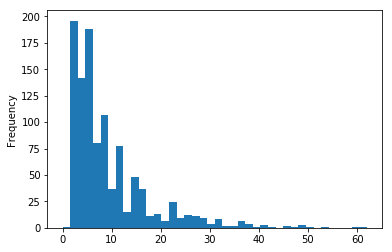

In [324]:
%matplotlib inline
df_liwc['i'].plot.hist(bins=40)

In [325]:
diario = df_liwc[df_liwc['class'] == 'diario']
outro = df_liwc[df_liwc['class'] == 'outro']
#df_liwc.to_csv('corpus_liwc_mtx.csv.gz', compression='gzip')

In [326]:
## Significance Test

In [327]:
stats = pd.DataFrame(data={'diario_mean': diario.mean(axis=0)}, index=columns)
stats['diario_std'] = diario.std(axis=0)
stats['outro_mean'] = outro.mean(axis=0)
stats['outro_std'] = outro.std(axis=0)

In [328]:
significance = []
for column in list(stats.index.values):
    a = diario[column]
    b = outro[column]
    t, p = ttest_ind(a, b, equal_var=False)
    significance.append(p)
stats['significance'] = significance

In [329]:
stats_signify = stats[stats.significance <= 0.05]
stats_signify.sort_values('significance',ascending=True)

,diario_mean,diario_std,outro_mean,outro_std,significance
you,25.270833,17.399689,33.806122,22.928849,3.420557e-10
i,10.660714,9.296783,7.668367,6.401504,8.294430e-10
shehe,23.586310,16.951891,31.035714,21.520317,6.735804e-09
nonfl,8.895833,6.796675,11.864796,8.789356,1.297108e-08
preps,51.806548,33.466019,65.469388,42.111459,5.643705e-08
they,6.489583,5.819174,8.933673,7.705957,7.555235e-08
article,28.562500,19.251236,35.670918,23.800457,6.242151e-07
work,9.080357,9.309199,12.834184,13.677153,1.804873e-06
space,36.617560,24.918966,44.714286,28.687130,3.821845e-06
relig,2.305060,2.999370,3.719388,5.862694,1.059921e-05


## Most Informative Psychological Categories

In [330]:
psychological_columns = ['swear','social','family','friend','humans','affect','posemo','negemo','anx','anger','sad','cogmech','insight','cause','discrep','tentat','certain','inhib','incl','excl','percept','see','hear','feel','bio','body','health','sexual','ingest','relativ','motion','space','time','work','achieve','leisure','home','money','relig','death','assent','nonfl','filler']
psychological_stats = stats_signify.ix[psychological_columns]
psychological_stats.sort_values('significance',ascending=True).head(15)

,diario_mean,diario_std,outro_mean,outro_std,significance
nonfl,8.895833,6.796675,11.864796,8.789356,1.297108e-08
work,9.080357,9.309199,12.834184,13.677153,1.804873e-06
space,36.617560,24.918966,44.714286,28.687130,3.821845e-06
relig,2.305060,2.999370,3.719388,5.862694,1.059921e-05
incl,52.675595,33.467855,62.849490,39.100896,1.843630e-05
swear,19.636905,13.322851,23.614796,16.349667,4.826367e-05
achieve,11.369048,8.496732,14.022959,11.143655,5.171798e-05
social,71.464286,46.229408,84.040816,53.570551,1.135229e-04
cogmech,144.729167,89.574476,167.653061,104.864726,3.094344e-04
hear,5.104167,4.863365,6.255102,5.642479,7.824432e-04


## Relative LIWC

In [331]:
prop_liwc = df_liwc
prop_liwc.drop(prop_liwc.columns[0], axis=1,inplace=True)
prop_liwc.drop(prop_liwc.columns[0], axis=1,inplace=True)
prop_liwc = prop_liwc[prop_liwc.wc.apply(lambda x: str(x).isnumeric())]
prop_liwc = prop_liwc[prop_liwc['judges'] == 3]

wc_vector = prop_liwc['wc']
class_vector = prop_liwc['class']

prop_liwc.drop('class',axis=1,inplace=True)
prop_liwc.drop('judges',axis=1,inplace=True)
prop_liwc.drop('confidence',axis=1,inplace=True)
prop_liwc.drop('wc',axis=1,inplace=True)

prop_liwc.shape

(910, 64)

In [332]:
prop_matrix = prop_liwc.as_matrix().astype(float) / wc_vector.as_matrix().astype(float)[:, np.newaxis]
prop_liwc = pd.DataFrame(prop_matrix, columns=columns)

## Relative Significance

In [333]:
prop_liwc['class'] = class_vector
prop_liwc['wc'] = wc_vector

In [334]:
diario = prop_liwc[prop_liwc['class'] == 'diario']
outro = prop_liwc[prop_liwc['class'] == 'outro']

In [335]:
print(diario['wc'].astype(float).mean())
print(outro['wc'].astype(float).mean())

370.052631579
433.074576271


In [336]:
relative_stats = pd.DataFrame(data={'diario_mean': diario.mean(axis=0)}, index=columns)
relative_stats['diario_std'] = diario.std(axis=0)
relative_stats['outro_mean'] = outro.mean(axis=0)
relative_stats['outro_std'] = outro.std(axis=0)

In [337]:
liguistic_columns = ['funct','pronoun','ppron','i','we','you','shehe','they','ipron','article','verb','auxverb','past','present','future','adverb','preps','conj','negate','quant','number']
liguistic_stats = relative_stats.ix[liguistic_columns]
liguistic_stats[['diario_mean']].sort_values('diario_mean',ascending=False).head(5)

,diario_mean
funct,0.515579
pronoun,0.194006
verb,0.155130
preps,0.149230
ppron,0.125473


In [338]:
liguistic_stats[['outro_mean']].sort_values('outro_mean',ascending=False).head(5)

,outro_mean
funct,0.655458
pronoun,0.246634
preps,0.193069
verb,0.192711
ppron,0.164515


In [339]:
psychological_columns = ['swear','social','family','friend','humans','affect','posemo','negemo','anx','anger','sad','cogmech','insight','cause','discrep','tentat','certain','inhib','incl','excl','percept','see','hear','feel','bio','body','health','sexual','ingest','relativ','motion','space','time','work','achieve','leisure','home','money','relig','death','assent','nonfl','filler']
psychological_stats = relative_stats.ix[psychological_columns]
psychological_stats[['diario_mean']].sort_values('diario_mean',ascending=False).head(5)

,diario_mean
cogmech,0.406343
relativ,0.219136
social,0.205927
incl,0.150931
tentat,0.099767


In [340]:
psychological_stats[['outro_mean']].sort_values('outro_mean',ascending=False).head(5)

,outro_mean
cogmech,0.515686
relativ,0.284658
social,0.260138
incl,0.193542
tentat,0.130312


In [345]:
stats['diff'] = stats['diario_mean'] - stats['outro_mean'] 
stats.sort_values('diff',ascending=False).head(5)

,diario_mean,diario_std,outro_mean,outro_std,significance,diff
i,10.660714,9.296783,7.668367,6.401504,8.294430e-10,2.992347
past,15.406250,13.167051,14.512755,11.171064,2.395240e-01,0.893495
home,2.089286,2.870437,1.816327,2.599811,1.123867e-01,0.272959
friend,2.747024,3.165809,2.494898,2.767176,1.746669e-01,0.252126
filler,0.525298,1.214401,0.344388,0.794012,3.423192e-03,0.180910


In [346]:
stats.sort_values('diff',ascending=True).head(5)

,diario_mean,diario_std,outro_mean,outro_std,significance,diff
funct,180.869048,108.879693,206.211735,123.861252,8.100833e-04,-25.342687
cogmech,144.729167,89.574476,167.653061,104.864726,3.094344e-04,-22.923895
preps,51.806548,33.466019,65.469388,42.111459,5.643705e-08,-13.662840
social,71.464286,46.229408,84.040816,53.570551,1.135229e-04,-12.576531
incl,52.675595,33.467855,62.849490,39.100896,1.843630e-05,-10.173895
